
**<h1> MUSIC GENRE PREDICTION**

The full dataset can be downloaded from : **https://os.unil.cloud.switch.ch/fma/fma_metadata.zip**

Hereafter, snippets of code are included in this report for the sake of clarity.

<h3>1 INTRODUCTION

Music genre classification is a crucial step into the world of music information retrieval. Music genre categorization has been extremely useful in visualizing the history of each genre. With FM radio being used less and less, and streaming services like Spotify on the rise, genre classification is one of the key aspects in which users filter their music choices to suit an occasion. 
With this in mind, the goal of our project is to make use of the quantifiable features of a track like  acousticness, energy, danceability, etc and to successfully predict the genre of a particular track using a variety of models.

<h3>2 DATA

The raw dataset is collected from the Free Music Archive Dump, with a total of 106574 tracks labeled according to their track id, with features to aid the classification like acousticness, danceability, energy, instrumentalness, liveness, speechiness, tempo and valence. It also contains 223 temporal features which captures the beat for rhythmic similarity.  

The full raw dataset for this project can be downloaded here: https://drive.google.com/drive/folders/17n6RVgU_TOmgcixlFsqynmXCVqvKdVSd

Our raw dataset is in csv format, with 3 files as follows:

*   raw_echonest.csv : various audio and temporal features provided of music tracks of Spotify (formerly Echonest)
*   genres.csv: genres listed according to id and title
*   tracks.csv : lists tracks according to its album with features such as track id, duration, number of times a track is listened to, and, of course, the genres

In [ ]:
#Current path is from files in Google Colab
df = pd.read_csv("/content/raw_echonest.csv") 
df2 = pd.read_csv("/content/tracks.csv")

<h3>3 METHODS

<h4>3.1 DATA CLEANING

After cleaning our data, we merged the 3 CSV files into one CSV file for easier EDA - MergeGenre.csv

1. We dropped duplicate features, and features having more than 70% NAN values.

In [ ]:
df = pd.read_csv("/content/Merge_Genre.csv") #merged file
#Removing duplicate records
df.drop_duplicates(subset=['track_id'], inplace=True)

#Drop features having more than 70% NAN values
cname = []
for col in df.columns:
  i = (pd.isnull(df[col])).sum()
  if i/df.shape[0] > 0.70:
    cname.append(df[col].head(0))
    del df[col]


2. We adjusted headers so that they fit as the title of the column they were supposed to show.

In [ ]:
new_header = df2.iloc[0] #grab the 0'th row for the header
df2 = df2[2:] #take the data without the header row, 2nd row with NaN values 
df2.columns = new_header #set the new header

3. The attributes such as artist location, latitude, longitude etc which did not pertain to genre classification were removed. 

In [ ]:
#For Genre Recognition, attributes such as album release dates, artist latitude,longitude are not required and therefore, can be removed
del df['album_date']
del df['artist_latitude']
del df['artist_longitude']
del df['artist_location']
del df['Unnamed: 0']

4. We reduced a total of 223 temporal features by grouping and calculating mean of similarly sized features to a total of 11.

In [ ]:
#Merge temporal features : 0 to 11
#This is the first group of 0 to 11. Similar groups were made for the rest of the temporal features.
fvector = []
for r in range(0, df.shape[0]):
  sum = 0
  for c in df.columns:
    if c >= '000' and c <= '011':
      sum = sum + df.at[r,c]
  fvector.append(sum/12)

#Removing Old Temporal features   
for c in df.columns:
  if c >= '000' and c <='011':
    del df[c]

#Adding Mean Temporal Feature
df['Mean_Temporal_features_1'] = fvector

5. In genres.csv, there were multiple genre values (numbers) assigned to a ingle genre label (text), and the corresponding text with multiple genre values was assigned as 'nan'. We found out that the first number in the arranged list provides the maximum probability of a particular genre, and so, we adjusted our CSV file to assign the first numerical value to the corresponding label.

In [ ]:
j=0
new_label=[]
for i in df3[df3.columns[-1]].values:
    new_label.append(df3['genre_id'][j][0])
    j=j+1 
    
df3['genre_label_firstvalue']=new_label

6. For non- temporal features, we replaced NaN values with the mean.

In [ ]:
# Replacing genre with list of integers
#Filling NAN values of genre_top
j=0
new_label=[]

#the following code is for the feature 'danceability'
#Similar code follows for all features
for i in df['danceability'].astype(str).values:
      if(i=='nan'): 
        new_label.append(df['danceability'].mean())
      else:
        new_label.append(float(i))
del df['danceability']   
df['danceability'] = new_label

<h4>3.2 EDA
 


1. The data was sampled and then rows from the top, tail and bottom were randomly picked and examined. With the below features, correlation was found and plotted as a heatmap to compare.


In [ ]:
#Correlation
df1.head()
heatmap = sns.heatmap(df1.corr())
plt.figure(figsize=(20,10))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

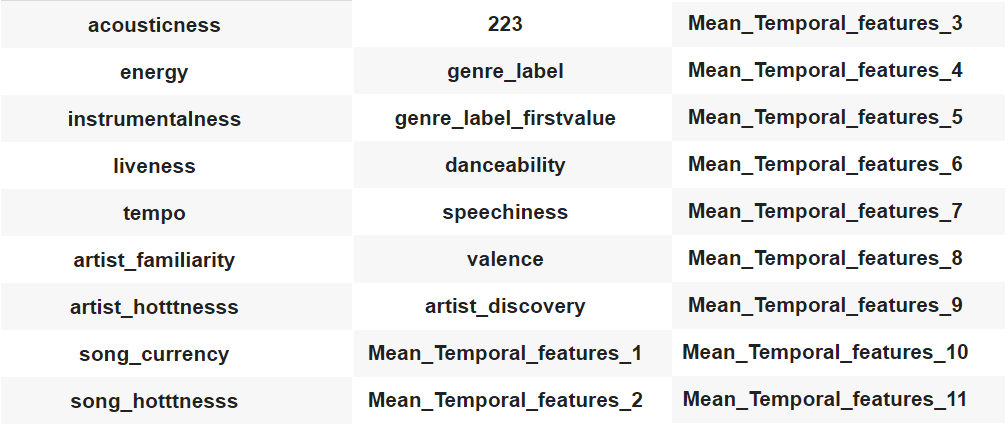

3. Also, a correlation heatmap was plotted in order to give the dependencies of these features a better representation. 

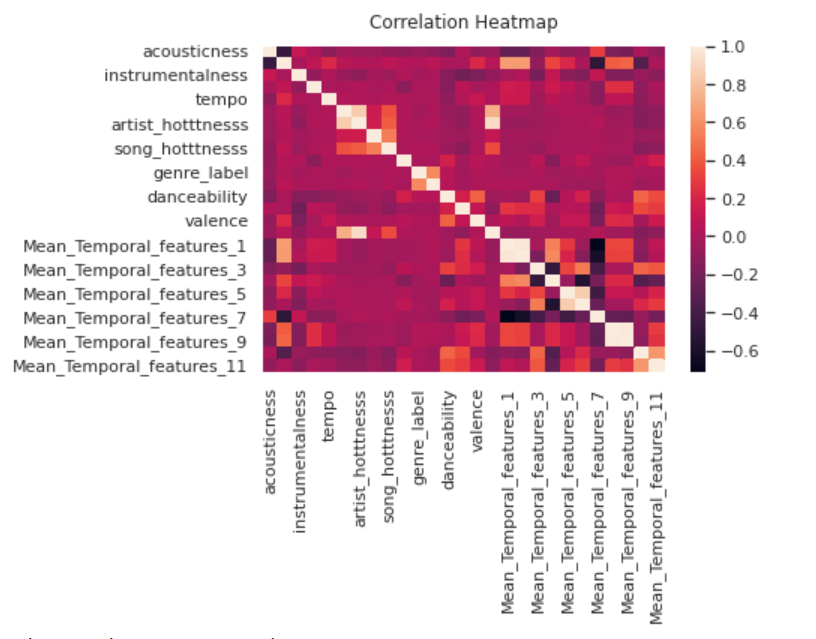

4. Various plots were used to decipher the relationship between the attributes of the file ‘MergeGenre.csv’. Bar plots were used to understand the extent to which the values of each musical feature affected the genre prediction. For instance, ‘Danceability’ is a feature that predominantly affected the genre ‘Hip-Hop’ while ‘Energy’ was an influential feature in deciding ‘Rock’ genre.

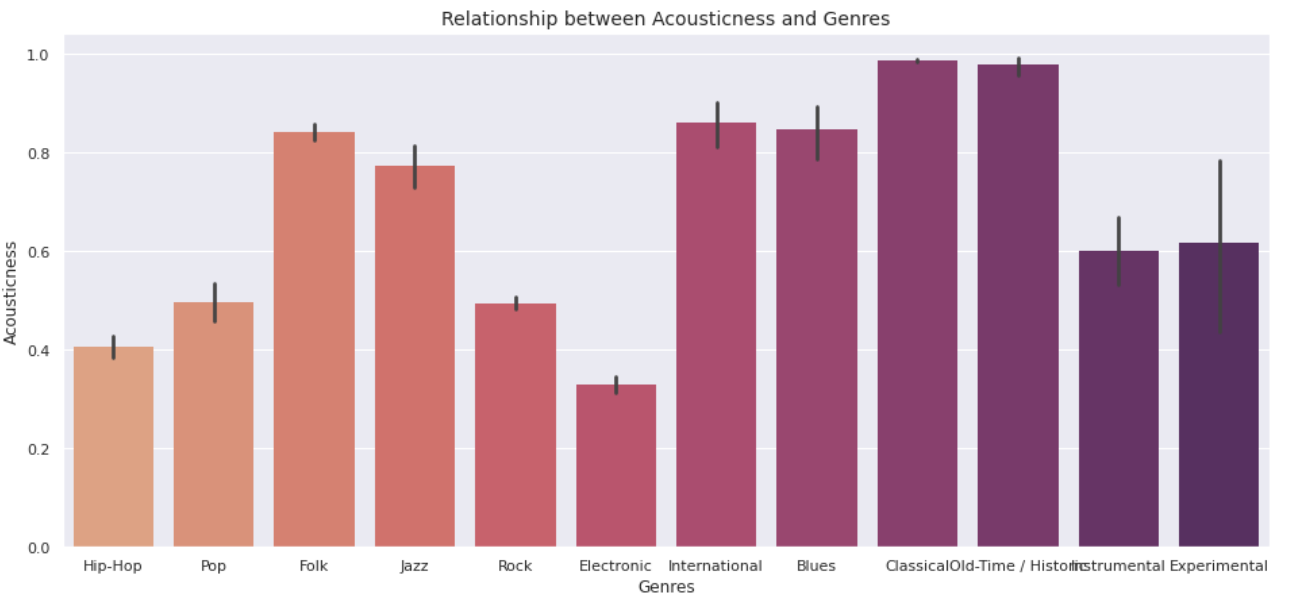

5. In order to find the best model to work with, we also performed correlation based on all features relating to each specific feature.
The following 8 features were used.
*   Acousticness 
*   Danceability
*   Energy
*   Instrumentalness
*   Liveness
*   Speechiness
*   Tempo
*   Valence


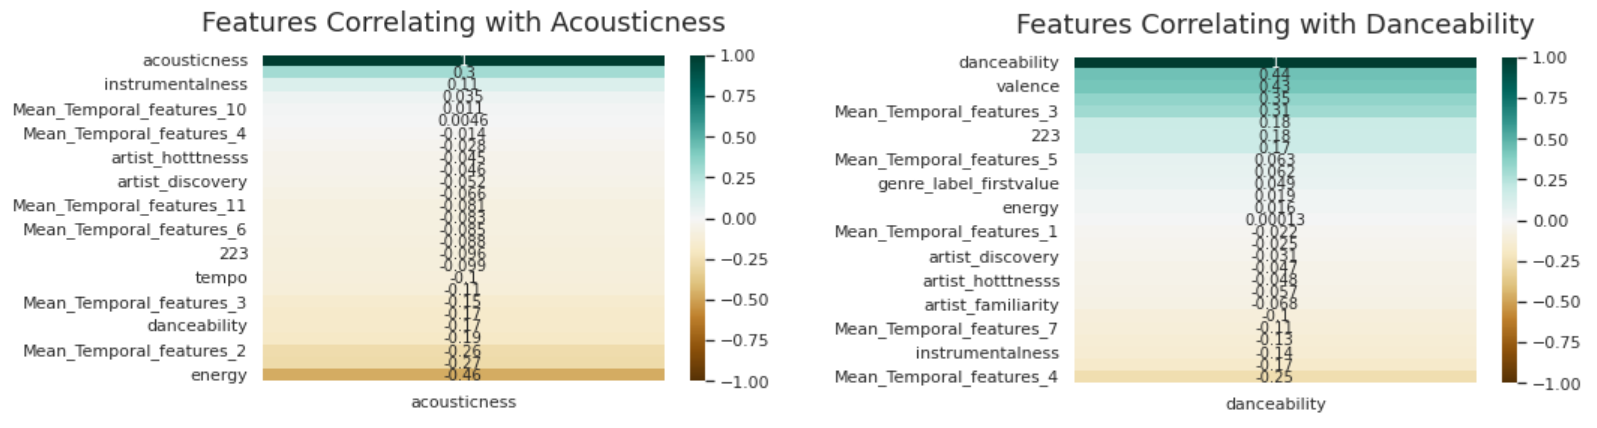

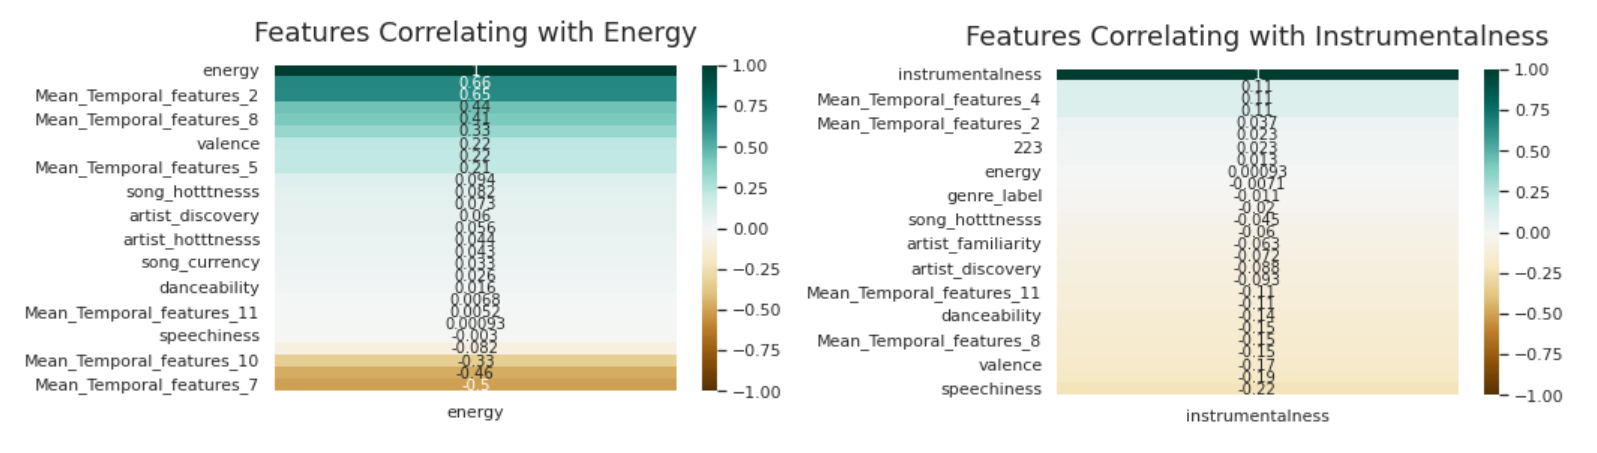

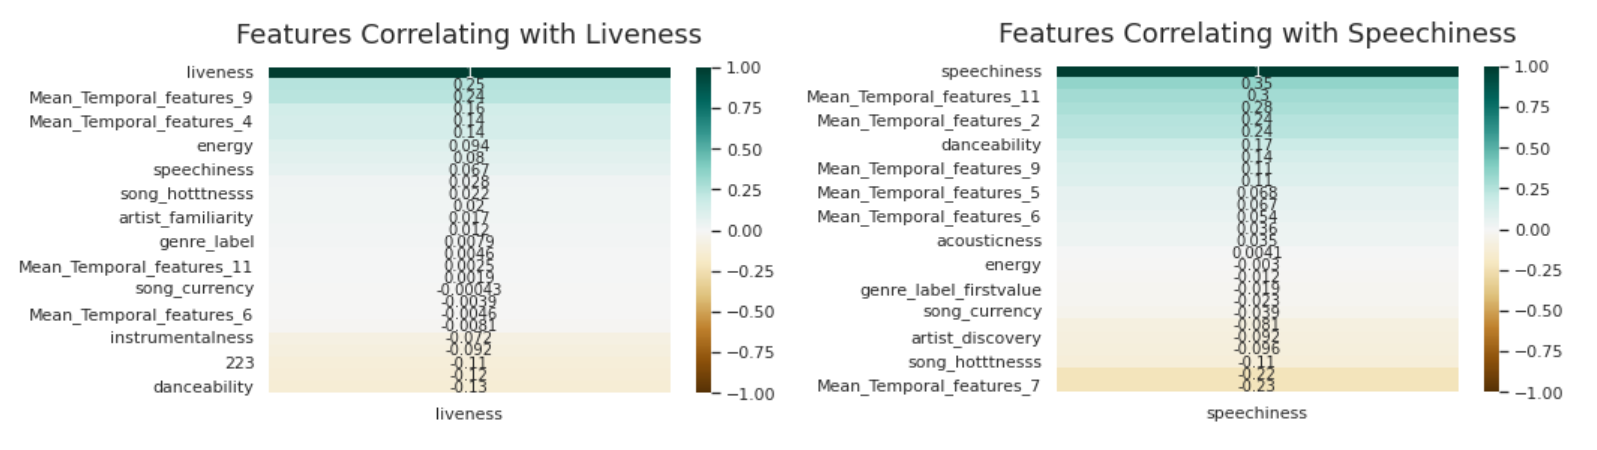

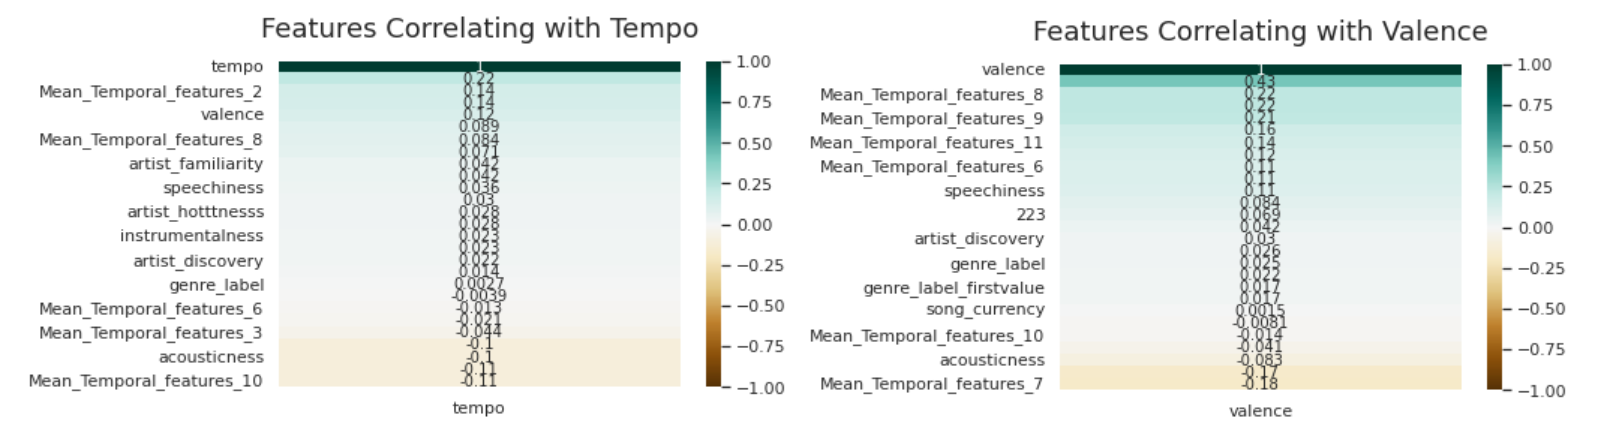

We constructed a simple baseline model based only on a set of if-then rules which was a direct application of the results of EDA. This baseline model was then used as a starting point to further develop our project by employing the concepts of machine learning. The findings of these plots were then used to frame a set of heuristics. These heuristics were used to formulate our baseline model.


<h3>4 ANALYSIS

<h2>4.1 MODELS

4.1.1 K NEAREST NEIGHBOUR 
<br>K Nearest Neighbour or KNN as it is called, is a non-parametric supervised machine learning model that focuses on instance-based learning. The hyperparameter K indicates the number of neighbours. 
The number of neighbours was initially set to 10. However, the model gave an improved accuracy of 30% with all features. The results were even better when the model was executed using a select features like 'acousticness' and 'danceability'.
We tuned the hyperparameter K , by checking the accuracy for multiple number of features , as shown in the plot below.

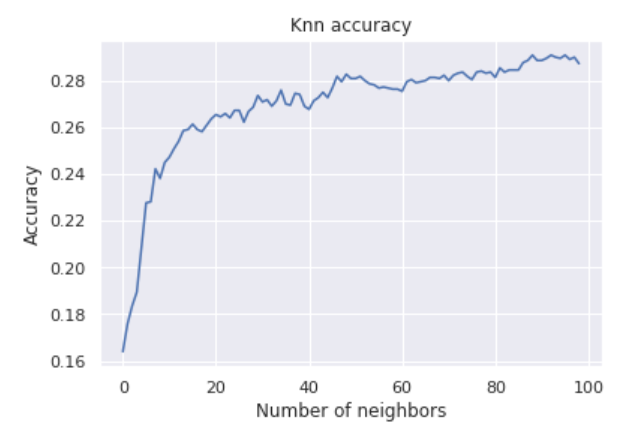

4.1.2 NAIVE BAYES
<br>A model used for classification, Naive Bayes is based on Bayes' Theorem with an assumption of independence among predictors. A number of classifiers are available for Naive Bayes like Bernoulli (for true/false), Multinomial (for frequency) and Gaussian Naive Bayes (for discrete values) which we have used. Since RFE was not supported in scikit-learn, we used feature importance to discern the highest ranked features - numbers 0,1,2,10 and 23, increasing our accuracy from 28% to around 32%. 

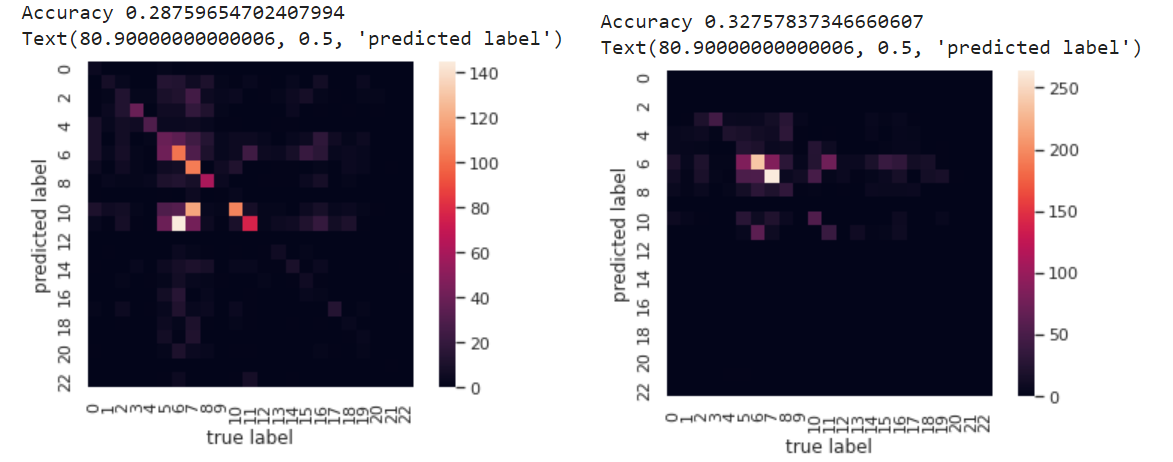

4.1.3 LOGISTIC REGRESSION

Multiclass Logistic Regression is another algorithm that can be used for classification. This algorithm puts one class against all other classes and runs a binary classifier. It is called One Versus Rest algorithm precisely for this reason. The probability of each class is returned during execution and the classifier chooses the class with the highest probability.
 The csv file Mergegenre was given as an input to this classifier and an accuracy of 33.3% was attained with all features.

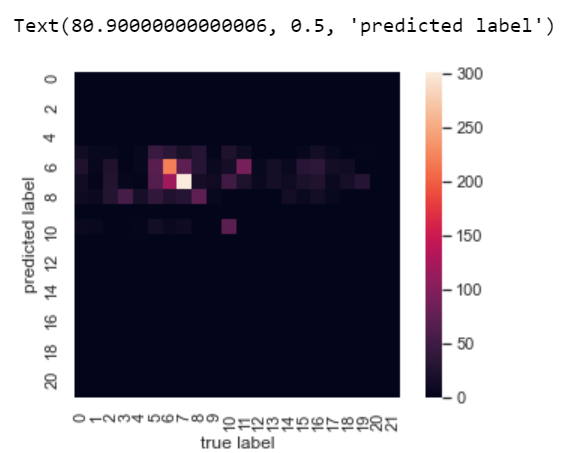

4.1.4 RANDOM FOREST CLASSIFIER: 


Random Forest builds an ensemble of decision trees and trains them with "bagging" method. This method votes for the best decision out of the ones decided by all the decision trees. This also gives the relative importance of fearures. Running the Random Forest classifier on our Mergegenre.csv with all the features gave us an accuracy of 53%.
The features - 'Acousticness' and 'Instrumentalness' were identified as highly ranked features. 

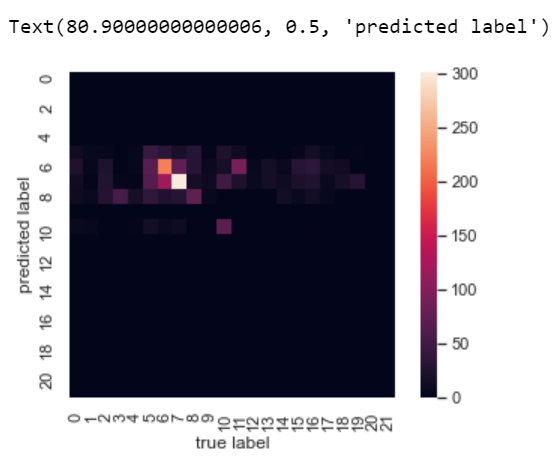

4.1.5 DECISION TREE CLASSIFIER:

Decision trees are widely used in data mining of all sorts. With a top down approach, a tree structure is formed by dividing the features into uniform subgroups using divide and conquer, having the leaves as the final outcome. The data from Mergegenre.csv is split on: the features vs the genre label.Our goal was to find the optimum split criterion, and for that we used two classifiers which are Gini Index and Entropy. We used RFE (Recursive Feature Elimination) to find the best set of features. As seen above , our best model has two features ( Speechiness and Tempo). These features with a criterion on gini gave us our best model accuracy of 86.91%


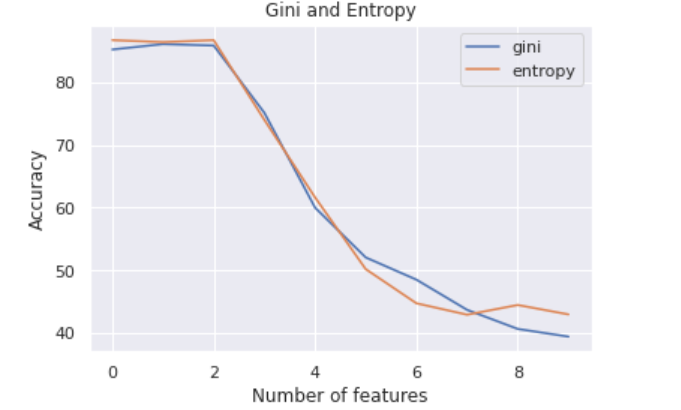

# <h3>4 RESULTS

On comparing our models we found that our accuracies increased greatly for Decision Tree Algorithm with criterion as gini with RFE selecting two features (Speechiness and Tempo). The highest accuracy was 86.91%
 This is shown in the following plot:


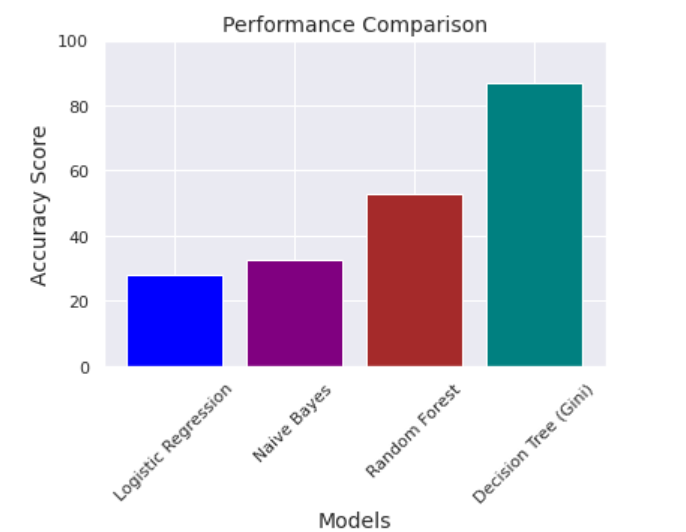

Our results were greatly affected by feature selection ,and hyperparameter tuning.
Hyperparameter tuning increased the accuracy of our K Nearest neighbor algorithm,
furthermore Recursive Feature elimination increased the accuracy of our best model (Decision Tree) from 30 to 80%. 


# <h3>5 CONCLUSION

The scope of this project was limited to predicting the various genres of music tracks by making use of their features.
This project saw us identify, analyze and understand the dependencies of the features individually and in a group. 
Studying the results and their patterns made us understand that the dataset was skewed towards the non-temporal features. 
This also showed how a set of genres are more similar than others. We arrived at this conclusion based on the fact that all the related genres have only minor differences in the features that help us distinguish one genre from another.
In future, the labels of genres can be considered as natural language tags and musical annotation tagging can be performed on the same dataset.
